# **Painting Dataset**

### **Data Description:**
In my project I will perform image processing to analyzing paintings images and perform NLP on the title and description of the image to see the emotions evoked from the paintings. I will compare the emotion results I get from the image of the painting and the title and description of the painting


### **Data Content:**
Here's a list of colours commonly used to identify several emotions:

Red: Anger, embarrassment, passion, or love.

Blue: Shyness, sadness, or calmness.

Yellow: Cowardice, happiness, cheerful, or caution.

Green: Disgust, envy, ,greed,friendliness, soothing, calm, or safety

Purple: Pride, fear, or courage.

Grey: Depression, regular sadness, or stoicism.

Black: Coldness or mournfulness.

Pink: Cheeriness, embarrassment, or love.

White: Shock, fear, coldness, or mournfulness.

Orange: happiness and healthy

Purple: sadness, disgust, or mystery

-------------------------------------------------------------------------------------------------------------------------


Lines

A dark, thick, angled line can show anger or being mad
A thin, flowing, rounded line can show happiness


Shapes

Squares, triangles and rectangles can show anger, fear, confusion
Ovals can show sadness
Circles can show happiness and joy


### **Data Dictionary:**

Original Data Columns
╔════════════════════╦════════════════════════════════════════════════════════╗
║ ID                 ║ Painting ID                                            ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Category           ║ Painting style (Impressionism, realism, cubism .. etc) ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Artist             ║ The artist's name                                      ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Title              ║ The title of the Painting                              ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Year               ║ The year of the painting                               ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Image URL          ║ URL of the website that contains the image             ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Painting Info URLe ║ Info of the painting link                              ║
╠════════════════════╬════════════════════════════════════════════════════════╣
║ Artist Info URL    ║ Info on the artist link                                ║
╚════════════════════╩════════════════════════════════════════════════════════╝

Data After Adding Columns




#### Import libraries and read files

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
from sklearn.neighbors import LocalOutlierFactor #Outliar handling

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [4]:
df = pd.read_csv("data/WikiArt-info.tsv", sep='\t')
df.head()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
4,57727de7edc2cb3880e91f26,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,https://uploads6.wikiart.org/images/david-wilk...,https://www.wikiart.org/en/david-wilkie/the-de...,https://www.wikiart.org/en/david-wilkie


In [5]:
df.columns

Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL'],
      dtype='object')

In [6]:
df.shape

(4119, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4119 non-null   object
 1   Category           4119 non-null   object
 2   Artist             4119 non-null   object
 3   Title              4119 non-null   object
 4   Year               4119 non-null   object
 5   Image URL          4119 non-null   object
 6   Painting Info URL  4119 non-null   object
 7   Artist Info URL    4119 non-null   object
dtypes: object(8)
memory usage: 257.6+ KB


In [8]:
{col:df[col].nunique() for col in df}

{'ID': 4119,
 'Category': 46,
 'Artist': 1003,
 'Title': 3764,
 'Year': 656,
 'Image URL': 4119,
 'Painting Info URL': 4119,
 'Artist Info URL': 1004}

In [9]:
df.Artist.value_counts()

Eyvind Earle             31
Pietro Perugino          23
Sam Francis              23
Mark Rothko              19
Willi Baumeister         19
                         ..
Gianfranco Baruchello     1
Lennart Rodhe             1
Arman                     1
Gerhard Richter           1
Oleg Holosiy              1
Name: Artist, Length: 1003, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


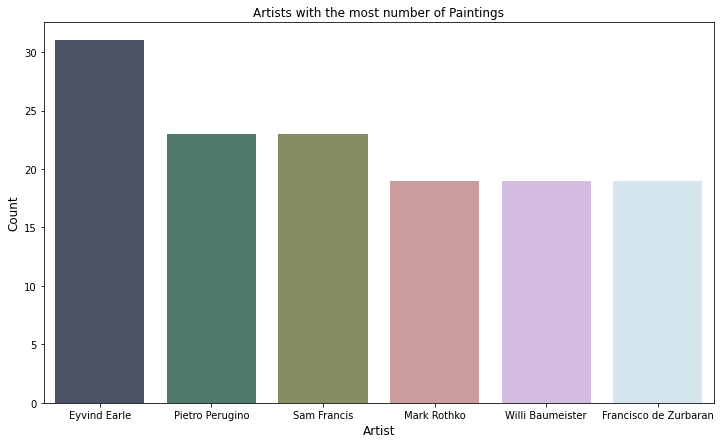

In [10]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Artist'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Artists with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


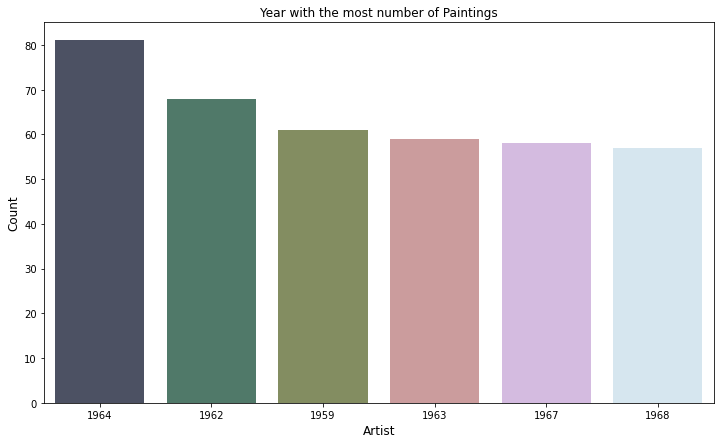

In [11]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Year'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Year with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.show()

In [264]:
df.isnull().sum()

ID                   0
Category             0
Artist               0
Title                0
Year                 0
Image URL            0
Painting Info URL    0
Artist Info URL      0
dtype: int64

In [13]:
df.Year.value_counts()

1964         81
1962         68
1959         61
1963         59
1967         58
             ..
1475-1478     1
1495-1515     1
1913-1915     1
1747-1749     1
1584          1
Name: Year, Length: 656, dtype: int64

In [97]:
df[['Category','Year']].value_counts()


Category           Year           
Neoclassicism      XVIII-XIX cent.    33
Minimalism         1967               27
Surrealism         1937               25
Minimalism         1968               23
                   1969               22
                                      ..
                   1967-1968           1
                   1970                1
Neo-Expressionism  1950                1
                   1951                1
Abstract Art       1883                1
Length: 1219, dtype: int64

In [ ]:
Modern = ['Impressionism','Pop Art', 'Neo-Expressionism', 'Art Informel', 'Post-Impressionism','Surrealism','Lyrical Abstraction',
'Abstract Expressionism','Abstract Art','Cubism','Magic Realism']

In [ ]:
Western = ['Realism','Northern Renaissance','Baroque', 'Rococo', 'Romanticism', 'Expressionism','Neoclassicism','Early Renaissance',
'High Renaissance']

In [ ]:
Contemporary = ['Minimalism' ]

In [81]:
Modern_df = df[(df.Category =='Cubism') | (df.Category =='Impressionism') |(df.Category =='Surrealism') ]

#### Data Exploring:

In [256]:
top5artists = df['Artist'].value_counts().head(5)
top5artists

Eyvind Earle        31
Pietro Perugino     23
Sam Francis         23
Mark Rothko         19
Willi Baumeister    19
Name: Artist, dtype: int64

In [263]:
df[df.Artist == 'Eyvind Earle']

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
154,57727e13edc2cb3880e9b45b,Magic Realism,Eyvind Earle,My Soul,2000,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/my-sou...,https://www.wikiart.org/en/eyvind-earle
629,57727e10edc2cb3880e9b02d,Magic Realism,Eyvind Earle,Evening Magic,2000,https://uploads1.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/evenin...,https://www.wikiart.org/en/eyvind-earle
652,57727e15edc2cb3880e9b893,Magic Realism,Eyvind Earle,The Wave,1990,https://uploads5.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/the-wa...,https://www.wikiart.org/en/eyvind-earle
729,57727e17edc2cb3880e9ba8b,Magic Realism,Eyvind Earle,Moon Bath,1988,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/moon-b...,https://www.wikiart.org/en/eyvind-earle
976,57727e18edc2cb3880e9bbe1,Magic Realism,Eyvind Earle,Enchanted Coast,1980,https://uploads3.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/enchan...,https://www.wikiart.org/en/eyvind-earle
1152,57727e10edc2cb3880e9b01b,Magic Realism,Eyvind Earle,Even Tide,1994,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/even-t...,https://www.wikiart.org/en/eyvind-earle
1270,57727e12edc2cb3880e9b287,Magic Realism,Eyvind Earle,Hidden Hills,XX-XXI cent.,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/hidden...,https://www.wikiart.org/en/eyvind-earle
1586,57727e18edc2cb3880e9bbf3,Magic Realism,Eyvind Earle,Blue Pine,1980,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/blue-p...,https://www.wikiart.org/en/eyvind-earle
1600,57727e15edc2cb3880e9b839,Magic Realism,Eyvind Earle,Sunset Magic,1996,https://uploads0.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/sunset...,https://www.wikiart.org/en/eyvind-earle
1608,57727e12edc2cb3880e9b1f7,Magic Realism,Eyvind Earle,Grazing in Peace,1970,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/grazin...,https://www.wikiart.org/en/eyvind-earle


In [253]:
topArtist1 = df[df.Artist == 'Eyvind Earle']
topArtist1

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
154,57727e13edc2cb3880e9b45b,Magic Realism,Eyvind Earle,My Soul,2000,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/my-sou...,https://www.wikiart.org/en/eyvind-earle
629,57727e10edc2cb3880e9b02d,Magic Realism,Eyvind Earle,Evening Magic,2000,https://uploads1.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/evenin...,https://www.wikiart.org/en/eyvind-earle
652,57727e15edc2cb3880e9b893,Magic Realism,Eyvind Earle,The Wave,1990,https://uploads5.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/the-wa...,https://www.wikiart.org/en/eyvind-earle
729,57727e17edc2cb3880e9ba8b,Magic Realism,Eyvind Earle,Moon Bath,1988,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/moon-b...,https://www.wikiart.org/en/eyvind-earle
976,57727e18edc2cb3880e9bbe1,Magic Realism,Eyvind Earle,Enchanted Coast,1980,https://uploads3.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/enchan...,https://www.wikiart.org/en/eyvind-earle
1152,57727e10edc2cb3880e9b01b,Magic Realism,Eyvind Earle,Even Tide,1994,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/even-t...,https://www.wikiart.org/en/eyvind-earle
1270,57727e12edc2cb3880e9b287,Magic Realism,Eyvind Earle,Hidden Hills,XX-XXI cent.,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/hidden...,https://www.wikiart.org/en/eyvind-earle
1586,57727e18edc2cb3880e9bbf3,Magic Realism,Eyvind Earle,Blue Pine,1980,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/blue-p...,https://www.wikiart.org/en/eyvind-earle
1600,57727e15edc2cb3880e9b839,Magic Realism,Eyvind Earle,Sunset Magic,1996,https://uploads0.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/sunset...,https://www.wikiart.org/en/eyvind-earle
1608,57727e12edc2cb3880e9b1f7,Magic Realism,Eyvind Earle,Grazing in Peace,1970,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/grazin...,https://www.wikiart.org/en/eyvind-earle


In [ ]:
df[df.Artist == 'Eyvind Earle']

In [4]:
df1 = pd.read_csv("data/full_emotion_color.csv")
df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/full_emotion_color.csv'